In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [233]:
os.getcwd()

'C:\\Users\\bahad\\GitHub\\Research\\Models'

In [234]:
pd.set_option("display.max_columns", None)

# Data Loading

In [235]:
data_initial=pd.read_csv("D:/Datasets/m5-forecasting-accuracy/Obtained_Data/first_scenario_group.csv",dtype={"event_name_1": object,
                                                                                         "event_type_1": object,
                                                                                         "event_name_2": object,
                                                                                         "event_type_2": object,},index_col=0)

In [236]:
data_initial["date"]=pd.to_datetime(data_initial["date"])

In [237]:
data_initial.sort_values(["date"])

,date,Sales,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,CA,TX,WI,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016
0,2011-01-29,58,NaN,NaN,NaN,NaN,0,0,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2011-01-30,62,NaN,NaN,NaN,NaN,0,0,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2011-01-31,41,NaN,NaN,NaN,NaN,0,0,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2011-02-01,46,NaN,NaN,NaN,NaN,1,1,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2011-02-02,28,NaN,NaN,NaN,NaN,1,0,1,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,2016-04-20,79,NaN,NaN,NaN,NaN,0,0,0,6.018992,4.88,4.403752,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1909,2016-04-21,71,NaN,NaN,NaN,NaN,0,0,0,6.018992,4.88,4.403752,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1910,2016-04-22,81,NaN,NaN,NaN,NaN,0,0,0,6.018992,4.88,4.403752,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1911,2016-04-23,69,NaN,NaN,NaN,NaN,0,0,0,6.018992,4.88,4.403752,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


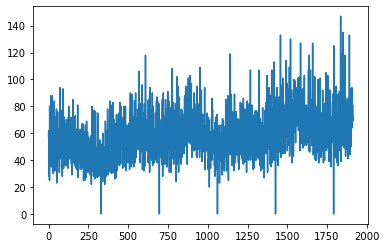

In [238]:
plt.plot(data_initial.Sales)

## Event Conversion

In [239]:
from sklearn.preprocessing import OneHotEncoder

In [240]:
hot_encoder=OneHotEncoder()

In [241]:
data_initial.drop(["event_name_1", "event_name_2", "event_type_2", "CA", "TX", "WI"], axis=1, inplace=True)

In [242]:
data_initial[data_initial["event_type_1"].isna()]["event_type_1"]=0
data_initial["event_type_1"]=data_initial["event_type_1"].astype(str)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [243]:
encoded_event=hot_encoder.fit_transform(data_initial[["event_type_1"]])
array_event=encoded_event.toarray()

In [244]:
hot_encoder.categories_

[array(['Cultural', 'National', 'Religious', 'Sporting', 'nan'],
       dtype=object)]

In [245]:
event_df=pd.DataFrame(array_event,columns=["Cultural", "National", "Religious", "Sporting", 'nan'])

In [246]:
frames=[data_initial, event_df]
data=pd.concat(frames, axis=1)

In [247]:
data.drop(["event_type_1", "nan"], axis=1, inplace=True)

In [248]:
data.head()

,date,Sales,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting
0,2011-01-29,58,0,0,0,5.959714,5.05,4.094626,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-01-30,62,0,0,0,5.959714,5.05,4.094626,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-01-31,41,0,0,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-02-01,46,1,1,0,5.959714,5.05,4.094626,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-02-02,28,1,0,1,5.959714,5.05,4.094626,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [249]:
data.describe()

,Sales,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting
count,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000
mean,57.989545,0.329326,0.329326,0.329326,6.100640,5.001814,4.343067,0.142708,0.142708,0.143231,0.143231,0.142708,0.142708,0.142708,0.082593,0.088866,0.097229,0.090957,0.081025,0.078411,0.081025,0.081025,0.078411,0.081025,0.078411,0.081025,0.176163,0.191323,0.190800,0.190800,0.190800,0.060115,0.018296,0.026660,0.027182,0.008364
std,17.539164,0.470091,0.470091,0.470091,0.148259,0.129844,0.184329,0.349866,0.349866,0.350399,0.350399,0.349866,0.349866,0.349866,0.275338,0.284624,0.296347,0.287623,0.272944,0.268887,0.272944,0.272944,0.268887,0.272944,0.268887,0.272944,0.381058,0.393445,0.393034,0.393034,0.393034,0.237762,0.134054,0.161129,0.162657,0.091095
min,0.000000,0.000000,0.000000,0.000000,5.807576,4.880000,3.959829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,0.000000,6.021163,4.880000,4.158238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,0.000000,0.000000,0.000000,6.067132,4.930000,4.437520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,69.000000,1.000000,1.000000,1.000000,6.166667,5.120000,4.463658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,147.000000,1.000000,1.000000,1.000000,6.460427,5.320000,4.610498,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [251]:
data.describe()

,Sales,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting
count,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000
mean,57.989545,0.329326,0.329326,0.329326,6.100640,5.001814,4.343067,0.142708,0.142708,0.143231,0.143231,0.142708,0.142708,0.142708,0.082593,0.088866,0.097229,0.090957,0.081025,0.078411,0.081025,0.081025,0.078411,0.081025,0.078411,0.081025,0.176163,0.191323,0.190800,0.190800,0.190800,0.060115,0.018296,0.026660,0.027182,0.008364
std,17.539164,0.470091,0.470091,0.470091,0.148259,0.129844,0.184329,0.349866,0.349866,0.350399,0.350399,0.349866,0.349866,0.349866,0.275338,0.284624,0.296347,0.287623,0.272944,0.268887,0.272944,0.272944,0.268887,0.272944,0.268887,0.272944,0.381058,0.393445,0.393034,0.393034,0.393034,0.237762,0.134054,0.161129,0.162657,0.091095
min,0.000000,0.000000,0.000000,0.000000,5.807576,4.880000,3.959829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,0.000000,6.021163,4.880000,4.158238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,0.000000,0.000000,0.000000,6.067132,4.930000,4.437520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,69.000000,1.000000,1.000000,1.000000,6.166667,5.120000,4.463658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,147.000000,1.000000,1.000000,1.000000,6.460427,5.320000,4.610498,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Performance Function

In [252]:
def performance_list(ID, forecast, actual):
    name=ID
    n=len(actual)
    error=actual-forecast
    mean=np.mean(actual)
    sd=actual.std()
    FBias=sum(error)/sum(actual)
    MPE=sum(error/actual)/n
    MAPE=sum(abs(error/actual))/n
    RMSE=np.sqrt(sum(error**2))/n
    MAD=sum(abs(error))/n
    WMAPE=MAD/mean
    result_df=pd.DataFrame({"Name" :       name ,
                            "# of inst":       n,
                            "Mean":         mean,
                            "Standard Dev.":  sd, 
                            "FBias":       FBias, 
                            "MPE":           MPE, 
                            "MAPE":         MAPE,                                      
                            "RMSE":         RMSE, 
                            "MAD":           MAD, 
                            "WMAPE":      WMAPE}, index=[0])
    return(result_df)

In [253]:
plt.plot(data[data["TX_1"]==1].Sales)

KeyError: 'TX_1'

In [254]:
# data['trend']=(data["date"]-data["date"].min()).dt.days

In [255]:
data.fillna(method="ffill", inplace=True)

### Train & Test

In [256]:
# train=data[data["date"]<((data["date"].max()-data["date"].min())*0.8)+data["date"].min()]

In [257]:
# test=data[data["date"]>=((data["date"].max()-data["date"].min())*0.8)+data["date"].min()]
# test.reset_index(drop=True, inplace=True)

### Train & Test Actual

In [258]:
import datetime as datetime

In [259]:
test_lenght=28
specific_date=data["date"].max()-datetime.timedelta(28)

In [260]:
train=data[data["date"]<=specific_date]

In [261]:
test=data[data["date"]>specific_date]
test.reset_index(drop=True, inplace=True)

### Date and Customer Drop

In [262]:
train=train.drop(["date"], axis=1)
test=test.drop(["date"], axis=1)

In [263]:
X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]

# Linear Regression-Elastic Net

In [264]:
from sklearn.model_selection import GridSearchCV

In [265]:
from sklearn.linear_model import ElasticNet

### Grid

In [266]:
elastic_net_model = ElasticNet()

In [267]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [268]:
elastic_net = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

In [269]:
elastic_net.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4],
                          'l1_ratio': [0.2, 0.4, 0.6]}],
             return_train_score=True)

In [270]:
elastic_predictions=elastic_net.predict(X_test)

In [271]:
performance_list("Control", elastic_net.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,1885,57.771353,17.4562,1.035484e-16,-inf,inf,0.311137,10.272302,0.17781


In [272]:
res_elastic=performance_list("Elastic Net Performance", elastic_predictions, y_test)

In [273]:
res_elastic

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,28,72.678571,17.161657,0.120749,0.087535,0.15401,3.289305,12.2903,0.169105


# Support Vector Machines

### Linear

In [274]:
from sklearn.svm import LinearSVR

In [275]:
sv_regressor=LinearSVR()

### Grid

In [276]:
param_grid_svm_linear=[
    {"epsilon":[0.5,1,1.5]}
]

In [277]:
sv_regressor = GridSearchCV(estimator=sv_regressor, param_grid=param_grid_svm_linear,
                 cv=10,return_train_score=True)

In [278]:
sv_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearSVR(),
             param_grid=[{'epsilon': [0.5, 1, 1.5]}], return_train_score=True)

### Poly with Kernel

In [279]:
from sklearn.svm import SVR

### Grid

In [280]:
param_grid_svm_poly=[
    {"degree":[2,3], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
]

In [281]:
sv_regressor_poly=SVR(kernel="poly")

In [282]:
sv_regressor_poly = GridSearchCV(estimator=sv_regressor_poly, param_grid=param_grid_svm_poly,
                 cv=10,return_train_score=True)

In [283]:
sv_regressor_poly.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(kernel='poly'),
             param_grid=[{'degree': [2, 3],
                          'epsilon': [0.02, 0.05, 0.1, 0.15, 0.2]}],
             return_train_score=True)

In [284]:
sv_regressor_poly.best_estimator_

SVR(epsilon=0.02, kernel='poly')

### Predictions

In [285]:
svm_predictions_linear=sv_regressor.predict(X_test)

In [286]:
res_svr_linear=performance_list("Support Vector Regressor Linear Performance", svm_predictions_linear, y_test)

In [287]:
svm_predictions_poly=sv_regressor_poly.predict(X_test)

In [288]:
res_svr_poly=performance_list("Support Vector Regressor Polynomial Performance", svm_predictions_poly, y_test)

In [289]:
performance_list("Control", sv_regressor.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,1885,57.771353,17.4562,0.020323,-inf,inf,0.303617,9.834671,0.170234


In [290]:
performance_list("Control", sv_regressor_poly.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,1885,57.771353,17.4562,0.031531,-inf,inf,0.339998,11.089746,0.191959


### Results

In [291]:
res_svr_linear

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Support Vector Regressor Linear Performance,28,72.678571,17.161657,0.049326,0.014976,0.14482,2.92769,10.957133,0.150762


In [292]:
res_svr_poly

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Support Vector Regressor Polynomial Performance,28,72.678571,17.161657,0.194712,0.16128,0.194113,3.965923,15.724274,0.216354


# Random Forest

In [293]:
from sklearn.ensemble import RandomForestRegressor

### Grid

In [294]:
param_grid=[
    {"n_estimators":[200,300,500], "max_features":[8,12,16],
     "bootstrap":[False,True]}
]

In [295]:
random_reg=RandomForestRegressor()
grid_search = GridSearchCV(estimator=random_reg, param_grid=param_grid,
                 cv=10,return_train_score=True)

### Predictions

In [296]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False, True],
                          'max_features': [8, 12, 16],
                          'n_estimators': [200, 300, 500]}],
             return_train_score=True)

In [297]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 8, 'n_estimators': 500}

### Results

In [298]:
rf_predictions=grid_search.predict(X_test)

In [299]:
res_rf=performance_list("Random Forest Performance", rf_predictions, y_test)

In [300]:
res_rf

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Random Forest Performance,28,72.678571,17.161657,0.085983,0.051976,0.171431,3.491007,13.093578,0.180157


In [301]:
performance_list("Control", grid_search.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,1885,57.771353,17.4562,-0.000768,-inf,inf,0.14203,4.574508,0.079183


# Feature Extraction

In [302]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree

### Train Node Selection

In [311]:
grid_search = DecisionTreeRegressor()

In [312]:
param_grid_feature = [
{'min_samples_leaf': [5, 7, 10, 15, 20], 'max_depth': [4, 5, 7, 10, 12, 15], 'min_samples_split': [30, 40, 50, 60, 80]}
]

In [313]:
estimator_best = GridSearchCV(grid_search, param_grid_feature, cv=5)

In [314]:
estimator_best.fit(X_train, y_train, )

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [4, 5, 7, 10, 12, 15],
                          'min_samples_leaf': [5, 7, 10, 15, 20],
                          'min_samples_split': [30, 40, 50, 60, 80]}])

## Best Parameters

In [315]:
estimator_best.best_estimator_

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=60)

### Final Decision Tree

In [316]:
estimator = DecisionTreeRegressor(max_depth= (estimator_best.best_estimator_.max_depth+4), 
                                  min_impurity_decrease= estimator_best.best_estimator_.min_impurity_decrease,
                                  min_samples_leaf= estimator_best.best_estimator_.min_samples_leaf,
                                  min_samples_split=estimator_best.best_estimator_.min_samples_split)

In [317]:
estimator.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=10, min_samples_split=60)

In [318]:
on_leaf = estimator.apply(X_train)
X_train_ext=X_train[:]
X_train_ext["Node"] = on_leaf.tolist()

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


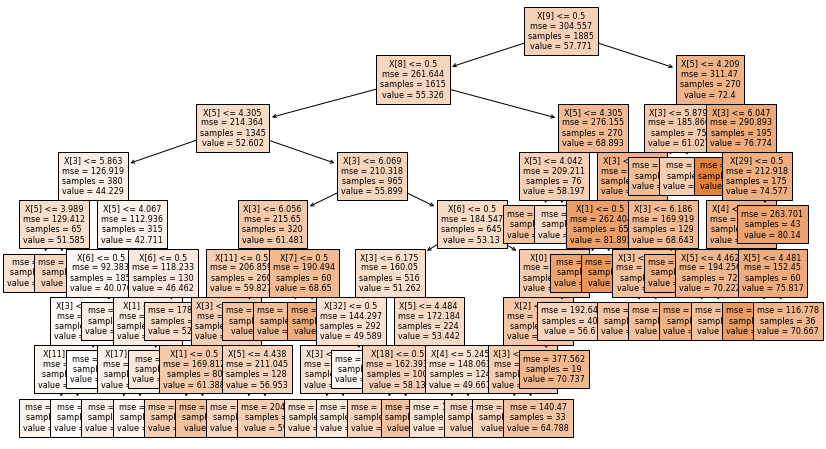

In [319]:
plt.figure(figsize=(14, 8)) 
plt.show(tree.plot_tree(estimator,filled=True, fontsize=8))

In [320]:
X_train_ext

,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,Node
0,0,0,0,5.959714,5.05,4.094626,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60
1,0,0,0,5.959714,5.05,4.094626,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73
2,0,0,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
3,1,1,0,5.959714,5.05,4.094626,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20
4,1,0,1,5.959714,5.05,4.094626,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,0,0,0,6.018760,4.88,4.404037,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,27
1881,0,0,0,6.018760,4.88,4.404037,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,27
1882,0,0,0,6.018760,4.88,4.404037,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,27
1883,0,0,0,6.018992,4.88,4.403752,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,63


### Test Node Selection

In [321]:
on_leaf_test = estimator.apply(X_test)

In [322]:
X_test_ext=X_test[:]

In [323]:
X_test_ext["Node"] = on_leaf_test.tolist()

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [324]:
X_test_ext

,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,Node
0,0,0,0,6.018992,4.88,4.403752,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,27
1,0,0,0,6.018992,4.88,4.403752,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,32
2,0,0,0,6.018992,4.88,4.403752,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,27
3,0,0,0,6.018992,4.88,4.403752,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,27
4,1,1,0,6.018992,4.88,4.403752,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,28
5,1,0,1,6.018992,4.88,4.403752,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,63
6,1,1,1,6.018992,4.88,4.403752,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,75
7,1,0,0,6.018992,4.88,4.403752,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,27
8,1,1,1,6.018992,4.88,4.403752,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,32
9,1,1,1,6.018992,4.88,4.403752,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,28


## New Feature Adding to Test Set

### Feature Adding

Ma=3 kullanıldı daha hızlı bir şekilde anlaşılması için

In [377]:
Xframes_feature=[X_train_ext, X_test_ext]
yframes_feature=[y_train, y_test]
X_concat=pd.concat(Xframes_feature)
Y_concat=pd.concat(yframes_feature)
final_frame=[X_concat, Y_concat]
concated_df=pd.concat(final_frame, axis=1)

In [378]:
concated_df["ma_1"] = concated_df.groupby(["Node"])["Sales"].shift(+1)
concated_df["ma_2"] = concated_df.groupby(["Node"])["Sales"].shift(+2)
concated_df["ma_3"] = concated_df.groupby(["Node"])["Sales"].shift(+3)

concated_df["new_feature"] = (concated_df["ma_1"]+concated_df["ma_2"]+concated_df["ma_3"])/3

concated_df.drop(["ma_1", "ma_2", "ma_3"], axis=1, inplace=True)

# Feature Control

In [382]:
concated_df["Sales_process"]=concated_df["Sales"]

In [383]:
for i in list(range(0,28)):
    current_node=concated_df.iloc[-(28-i)].Node
    train_dt=concated_df.iloc[:-(28-i)]
    test_dt=concated_df.iloc[-(28-i):]
    value_counts=test_dt.Node.value_counts().rename_axis('unique_values').reset_index(name='counts')
    ma_value=value_counts[value_counts["unique_values"]==current_node]["counts"].item()
    new_value=train_dt[train_dt["Node"]==int(current_node)].iloc[-ma_value:].Sales_process.rolling(ma_value).mean().iloc[-1]
    concated_df.iloc[-(28-i),concated_df.shape[1]-1]=new_value
    concated_df.iloc[-(28-i),concated_df.shape[1]-2]=new_value

In [384]:
concated_df.drop(["Sales_process"], axis=1, inplace=True)

In [385]:
X_test_new=concated_df.iloc[len(X_train):].drop(["Sales","Node"], axis=1)

y_test_new=concated_df.iloc[len(X_train):]["Sales"]

In [386]:
train_new=concated_df.iloc[:len(X_train)]

In [387]:
train_new.dropna(inplace=True);
train_new.reset_index(drop=True, inplace=True)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [388]:
X_train_new=train_new.drop(["Sales","Node"], axis=1)

y_train_new=train_new["Sales"]

# Linear Regression-Elastic Net

### Grid

In [389]:
elastic_net_model_new = ElasticNet()

In [390]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [391]:
elastic_net_new = GridSearchCV(estimator=elastic_net_model_new, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

In [392]:
elastic_net_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4],
                          'l1_ratio': [0.2, 0.4, 0.6]}],
             return_train_score=True)

In [393]:
elastic_predictions_new=elastic_net_new.predict(X_test_new)

In [394]:
res_elastic_new=performance_list("Elastic Net Performance with Feature Extraction", elastic_predictions_new, y_test_new)

In [395]:
res_elastic_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance with Feature Extraction,28,72.678571,17.161657,0.118838,0.084352,0.166678,3.493079,13.120227,0.180524


### SVM

#### Linear

In [396]:
sv_regressor_new=LinearSVR()

### Grid

In [397]:
param_grid_svm_linear=[
    {"epsilon":[0.5,1,1.5]}
]

In [398]:
sv_regressor_new = GridSearchCV(estimator=sv_regressor_new, param_grid=param_grid_svm_linear,
                 cv=10,return_train_score=True,)

In [399]:
sv_regressor_new.fit(X_train_new, y_train_new)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear f

GridSearchCV(cv=10, estimator=LinearSVR(),
             param_grid=[{'epsilon': [0.5, 1, 1.5]}], return_train_score=True)

In [400]:
svm_predictions_new=sv_regressor_new.predict(X_test_new)

res_svr_new=performance_list("SVR Linear Performance with Feature Extraction", 
                                svm_predictions_new, y_test_new)

res_svr_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,SVR Linear Performance with Feature Extraction,28,72.678571,17.161657,0.14955,0.117882,0.178628,3.602067,14.088976,0.193853


## Poly

### Grid

In [401]:
param_grid_svm_poly=[
    {"degree":[2,3,4], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
]

In [402]:
sv_regressor_poly_new=SVR(kernel="poly")

In [403]:
sv_regressor_poly_new = GridSearchCV(estimator=sv_regressor_poly_new, param_grid=param_grid_svm_poly,
                 cv=10,return_train_score=True)

In [404]:
sv_regressor_poly_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=SVR(kernel='poly'),
             param_grid=[{'degree': [2, 3, 4],
                          'epsilon': [0.02, 0.05, 0.1, 0.15, 0.2]}],
             return_train_score=True)

In [405]:
sv_regressor_poly_new.best_estimator_

SVR(degree=2, epsilon=0.02, kernel='poly')

In [406]:
svm_predictions_poly_new=sv_regressor_poly_new.predict(X_test_new)

res_svr_poly_new=performance_list("SVR Polynomail Performance with Feature Extraction", 
                                svm_predictions_poly_new, y_test_new)

res_svr_poly_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,SVR Polynomail Performance with Feature Extrac...,28,72.678571,17.161657,0.142361,0.106976,0.181923,3.805846,14.400847,0.198144


### Random Forest

In [407]:
param_grid=[
    {"n_estimators":[200,300,500], "max_features":[8,12,16],
     "bootstrap":[False,True]}
]

In [408]:
random_reg_new=RandomForestRegressor()
grid_search_new = GridSearchCV(estimator=random_reg_new, param_grid=param_grid,
                 cv=10,return_train_score=True)

In [409]:
grid_search_new.fit(X_train_new, y_train_new)

grid_search_new.best_params_

{'bootstrap': True, 'max_features': 8, 'n_estimators': 200}

In [410]:
rf_predictions_new=grid_search_new.predict(X_test_new)

res_rf_new=performance_list("Random Forest Performance with Feature Extraction", rf_predictions_new, y_test_new)

res_rf_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Random Forest Performance with Feature Extraction,28,72.678571,17.161657,0.089273,0.057682,0.177966,3.500656,13.557857,0.186545


# General Result Table

In [411]:
pd.options.display.float_format = '{:,.8f}'.format

In [412]:
result_frames=[res_elastic,res_svr_linear,res_svr_poly,res_rf, res_elastic_new,res_svr_new,res_svr_poly_new,res_rf_new]
total_result=pd.concat(result_frames)
total_result.reset_index(drop=True, inplace=True)

In [413]:
total_result

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,28,72.67857143,17.16165746,0.12074919,0.08753482,0.15401001,3.28930488,12.29030026,0.16910487
1,Support Vector Regressor Linear Performance,28,72.67857143,17.16165746,0.04932571,0.01497614,0.14481965,2.92769036,10.95713312,0.15076154
2,Support Vector Regressor Polynomial Performance,28,72.67857143,17.16165746,0.19471152,0.16127956,0.19411261,3.96592264,15.72427439,0.21635365
3,Random Forest Performance,28,72.67857143,17.16165746,0.08598299,0.05197620,0.17143063,3.49100679,13.09357772,0.18015733
4,Elastic Net Performance with Feature Extraction,28,72.67857143,17.16165746,0.11883831,0.08435222,0.16667758,3.49307882,13.12022737,0.18052401
5,SVR Linear Performance with Feature Extraction,28,72.67857143,17.16165746,0.14955047,0.11788151,0.17862755,3.60206739,14.08897593,0.19385323
6,SVR Polynomail Performance with Feature Extrac...,28,72.67857143,17.16165746,0.14236104,0.10697551,0.18192320,3.80584620,14.40084749,0.19814434
7,Random Forest Performance with Feature Extraction,28,72.67857143,17.16165746,0.08927273,0.05768166,0.17796573,3.50065565,13.55785714,0.18654545


## RFOverfitting

In [414]:
rf_control=grid_search.predict(X_train)

performance_list("RF Performance without Feature Extraction",rf_control, y_train)

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
rf_control=grid_search.predict(X_test)

performance_list("RF Performance without Feature Extraction",rf_control, y_test)

In [ ]:
rf_control_feature=grid_search_new.predict(X_train_new)

performance_list("RF Performance with Feature Extraction", rf_control_feature, y_train_new)

In [ ]:
rf_control_feature=grid_search_new.predict(X_test_new)

performance_list("RF Performance with Feature Extraction", rf_control_feature, y_test_new)

# Feature Control

In [ ]:
plt.plot(data.Sales[:28])

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
plot_acf(data.Sales, lags=28)
plt.show()

## Node Control

In [ ]:
concated_df.Node.value_counts()

In [ ]:
total_result

# General Function

In [ ]:
# def result_obtain(df, feature_set, name, lag):

#     df[name]=feature_set
    
# #     train=df[df["date"]<((df["date"].max()-df["date"].min())*0.8)+df["date"].min()]
# #     test=df[df["date"]>=((df["date"].max()-df["date"].min())*0.8)+df["date"].min()]
# #     test.reset_index(drop=True, inplace=True)

#     train=data[data["date"]<=specific_date]

#     test=data[data["date"]>specific_date]
#     test.reset_index(drop=True, inplace=True)


#     ### Date and Customer Drop

#     train=train.drop(["date"], axis=1)
#     test=test.drop(["date"], axis=1)

#     X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
#     X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]
    
#     train.dropna(inplace=True);
#     train.reset_index(drop=True, inplace=True)
#     train.index += lag

#     X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
#     X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]
    
    
    
#     # Linear Regression-Elastic Net

#     elastic_net_function = ElasticNet()

#     param_grid_elastic=[
#         {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
#     ]

#     elastic_net_function = GridSearchCV(estimator=elastic_net_function, param_grid=param_grid_elastic,
#                      cv=10,return_train_score=True)
    
#     elastic_net_function.fit(X_train, y_train)
    

#     elastic_predictions=elastic_net_function.predict(X_test)

#     res_elastic=performance_list(["Elastic Net Performance Lag " + str(lag)], elastic_predictions, y_test)

    
    
#     # Support Vector Machines

#     ### Linear

#     sv_regressor=LinearSVR()
    

#     ### Grid

#     param_grid_svm_linear=[
#         {"epsilon":[0.5,1,1.5]}
#     ]

#     sv_regressor_function = GridSearchCV(estimator=sv_regressor, param_grid=param_grid_svm_linear,
#                      cv=10,return_train_score=True)

#     sv_regressor_function.fit(X_train, y_train)


    
#     sv_regressor_poly=SVR(kernel="poly")
        
#     ### Grid

#     param_grid_svm_poly=[
#         {"degree":[2,3], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
#     ]


#     sv_regressor_poly_function = GridSearchCV(estimator=sv_regressor_poly, param_grid=param_grid_svm_poly,
#                      cv=10,return_train_score=True)

#     sv_regressor_poly_function.fit(X_train, y_train)


#     ### Predictions

#     svm_predictions_linear=sv_regressor_function.predict(X_test)
    
#     svm_predictions_poly=sv_regressor_poly_function.predict(X_test)


#     ### Results    

#     res_svr_poly=performance_list(["SVR Polynomial Performance Lag " + str(lag)], svm_predictions_poly, y_test)

#     res_svr_linear=performance_list(["SVR Linear Performance Lag " + str(lag)], svm_predictions_linear, y_test)

    
    
    
#     # Random Forest
    
#     ### Grid

#     param_grid=[
#         {"n_estimators":[200,300,500], "max_features":[8,12,16],
#          "bootstrap":[False,True]}
#     ]

#     random_reg_function=RandomForestRegressor()
#     grid_search = GridSearchCV(estimator=random_reg_function, param_grid=param_grid,
#                      cv=10,return_train_score=True)

#     ### Predictions

#     grid_search.fit(X_train, y_train)

#     ### Results

#     rf_predictions=grid_search.predict(X_test)

#     res_rf=performance_list(["Random Forest Performance Lag " + str(lag)], rf_predictions, y_test)
    
#     res_df=[res_elastic, res_svr_linear, res_svr_poly, res_rf]

#     total_res=pd.concat(res_df)
    
#     return total_res

In [ ]:
# res1=result_obtain(data.copy(), data["Sales"].shift(+1), "lag1", 1)

In [ ]:
# res1

In [ ]:
# total_result